# AIR QUALITY INDEX PREDICTION

#### Team Members:
1. Aishwarya Mishra
2. Amulya Nittala
3. Zeenia Singla

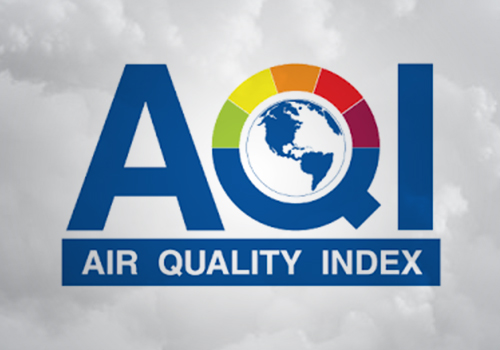

In [1]:
from IPython.display import Image
Image(r"C:\Users\zeeni\OneDrive\Desktop\AQI.jpg")

#### Objective:
The regression goal is to predict the Air Quality Index of all the states in India

#### Air Quality Index Data (1987-2015):
Contains data of different pollutants for all the states in India.


# Importing Modules

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Loading Data into Dataframe

In [80]:
data = pd.read_csv("data.csv",encoding="ISO-8859-1")
data.head().style.background_gradient(cmap = "Reds")

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.000000,February - M021990,Andhra Pradesh,Hyderabad,nan,"Residential, Rural and other Areas",4.800000,17.400000,nan,nan,nan,nan,1990-02-01
1,151.000000,February - M021990,Andhra Pradesh,Hyderabad,nan,Industrial Area,3.100000,7.000000,nan,nan,nan,nan,1990-02-01
2,152.000000,February - M021990,Andhra Pradesh,Hyderabad,nan,"Residential, Rural and other Areas",6.200000,28.500000,nan,nan,nan,nan,1990-02-01
3,150.000000,March - M031990,Andhra Pradesh,Hyderabad,nan,"Residential, Rural and other Areas",6.300000,14.700000,nan,nan,nan,nan,1990-03-01
4,151.000000,March - M031990,Andhra Pradesh,Hyderabad,nan,Industrial Area,4.700000,7.500000,nan,nan,nan,nan,1990-03-01


In [81]:
data.shape

(435742, 13)

In [82]:
data.describe().style.background_gradient(cmap = "Reds")

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [83]:
data.tail().style.background_gradient(cmap = "Reds")

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,nan,"Inside Rampal Industries,ULUBERIA",nan,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,nan,"Inside Rampal Industries,ULUBERIA",nan,2015-12-29
435739,nan,nan,andaman-and-nicobar-islands,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
435740,nan,nan,Lakshadweep,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
435741,nan,nan,Tripura,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [85]:
#Removing unnecessary columns
data.drop(['stn_code', 'sampling_date', 'agency', 'location_monitoring_station'], axis=1, inplace=True)
data.head().style.background_gradient(cmap = "Reds")

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,nan,nan,nan,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,nan,nan,nan,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,nan,nan,nan,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,nan,nan,nan,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,nan,nan,nan,1990-03-01


## Exploratory Data Analysis

In [86]:
#Null values
data.apply(lambda x: sum(x.isnull()))

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
dtype: int64

In [87]:
#Unique values
data.apply(lambda x: len(x.unique()))

state         37
location     305
type          11
so2         4198
no2         6865
rspm        6066
spm         6669
pm2_5        434
date        5068
dtype: int64

In [88]:
#Imputing missing values with mean for numerical columns
data['rspm'].fillna(data["rspm"].mean(),inplace=True)
data['so2'].fillna(data["so2"].mean(),inplace=True)
data['no2'].fillna(data["no2"].mean(),inplace=True)
data['spm'].fillna(data["spm"].mean(),inplace=True)
data['pm2_5'].fillna(data["pm2_5"].mean(),inplace=True)

In [89]:
#Imputing missing values with mean for categorical columns
data['date'].fillna(data["date"].mode().max(),inplace=True)
data['type'].fillna(data["type"].mode().max(),inplace=True)
data['location'].fillna(data["location"].mode().max(),inplace=True)

In [90]:
#Checking nulls
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64

In [91]:
data.head().style.background_gradient(cmap = "Blues")

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.783480,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,108.832784,220.783480,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.783480,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.783480,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,108.832784,220.783480,40.791467,1990-03-01


### Bivariate Analysis

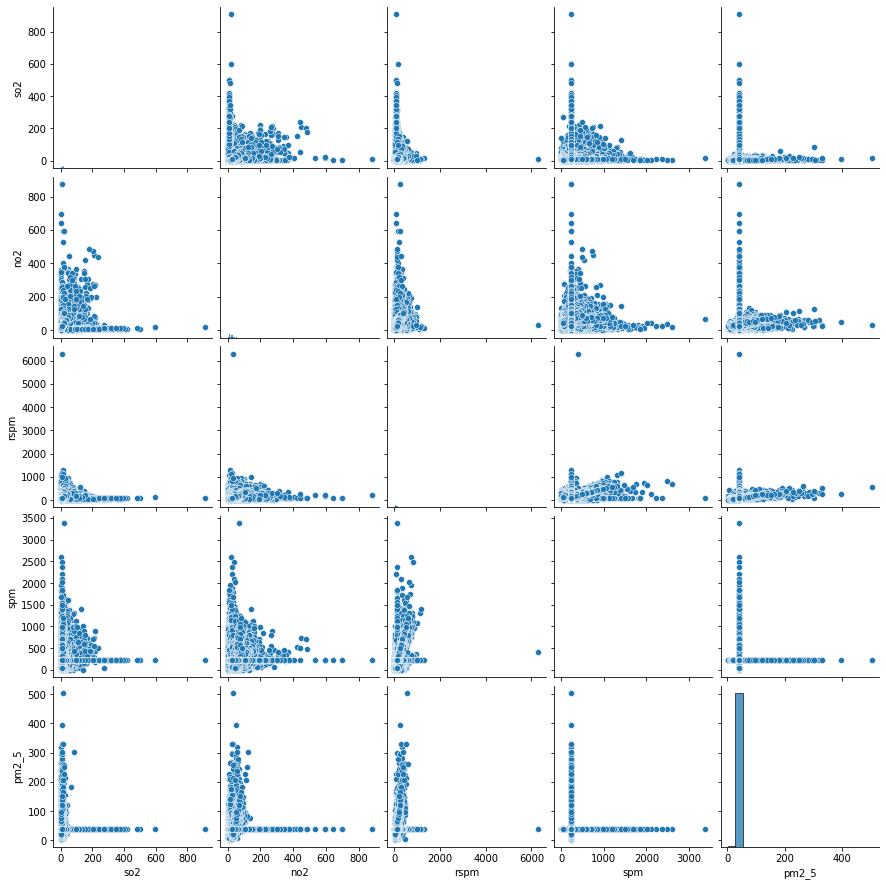

In [15]:
sns.pairplot(data)

## Calculating AQI values as per National Air Quality Standards

### Calculating individual pollutant index

In [92]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si

def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni

def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi

def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi


### Adding pollutant index to dataset

In [93]:
data['so2 index']=data['so2'].apply(calculate_si)
df= data[['so2','so2 index']]

data['no2 index']=data['no2'].apply(calculate_ni)
df= data[['no2','no2 index']]

data['rspm index']=data['rspm'].apply(calculate_si)
df= data[['rspm','rspm index']]

data['spm index']=data['spm'].apply(calculate_spi)
df= data[['spm','spm index']]

data['pm2_5 index']=data['pm2_5'].apply(calculate_pmi)
df= data[['pm2_5','pm2_5 index']]

data.head().style.background_gradient(cmap = "Pastel2")

,state,location,type,so2,no2,rspm,spm,pm2_5,date,so2 index,no2 index,rspm index,spm index,pm2_5 index
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.783480,40.791467,1990-02-01,6.000000,21.750000,109.610928,180.522320,40.791467
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,108.832784,220.783480,40.791467,1990-02-01,3.875000,8.750000,109.610928,180.522320,40.791467
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.783480,40.791467,1990-02-01,7.750000,35.625000,109.610928,180.522320,40.791467
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.783480,40.791467,1990-03-01,7.875000,18.375000,109.610928,180.522320,40.791467
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,108.832784,220.783480,40.791467,1990-03-01,5.875000,9.375000,109.610928,180.522320,40.791467


### AQI scale from 0 to 500

In [42]:
from IPython.display import Image
Image(url= "https://www.airveda.com/resources/images/aqi_calculation_update/chart.png")

### Calculate AQI

In [94]:
#function to calculate the air quality index (AQI) of every data value as per Indian Govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi

data['AQI']=data.apply(lambda x:calculate_aqi(x['so2 index'],x['no2 index'],x['spm index'],x['rspm index']),axis=1)
df= data[['state','so2', 'no2', 'rspm', 'spm', 'pm2_5','so2 index','no2 index','rspm index','spm index','pm2_5 index','AQI']]

df.head().style.background_gradient(cmap = "Pastel2")

,state,so2,no2,rspm,spm,pm2_5,so2 index,no2 index,rspm index,spm index,pm2_5 index,AQI
0,Andhra Pradesh,4.800000,17.400000,108.832784,220.783480,40.791467,6.000000,21.750000,109.610928,180.522320,40.791467,180.522320
1,Andhra Pradesh,3.100000,7.000000,108.832784,220.783480,40.791467,3.875000,8.750000,109.610928,180.522320,40.791467,180.522320
2,Andhra Pradesh,6.200000,28.500000,108.832784,220.783480,40.791467,7.750000,35.625000,109.610928,180.522320,40.791467,180.522320
3,Andhra Pradesh,6.300000,14.700000,108.832784,220.783480,40.791467,7.875000,18.375000,109.610928,180.522320,40.791467,180.522320
4,Andhra Pradesh,4.700000,7.500000,108.832784,220.783480,40.791467,5.875000,9.375000,109.610928,180.522320,40.791467,180.522320


## Exploratory Data Analysis

<AxesSubplot:>

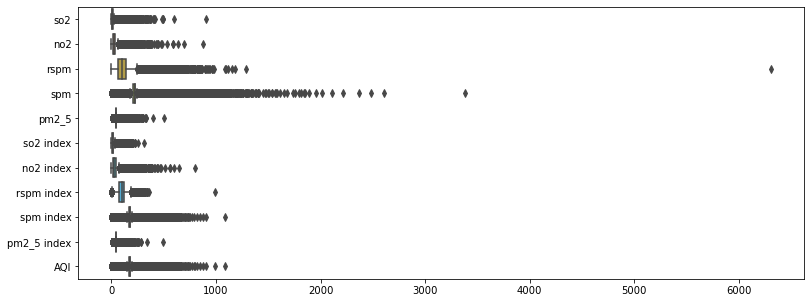

In [44]:
plt.figure(figsize=(13,5))

sns.boxplot(data=df,orient='h')

### Correlation of all pollutants along with AQI

<AxesSubplot:>

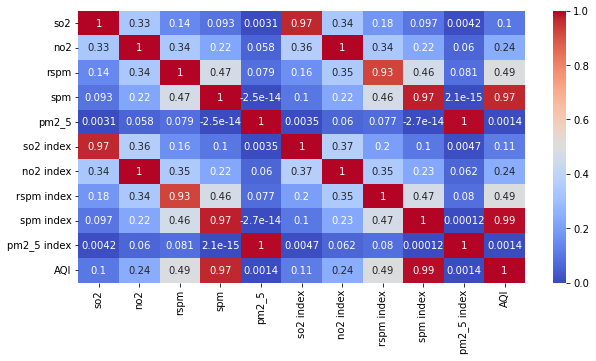

In [47]:
plt.figure(figsize = (10,5))

sns.heatmap(df.corr(),annot =True, cmap="coolwarm")

### State-wise distribution of pollutants in India

In [95]:
data.groupby('state')[['spm','rspm','so2','no2','pm2_5','AQI']].mean().style.background_gradient(cmap = "Blues")

,spm,rspm,so2,no2,pm2_5,AQI
state,,,,,,
Andhra Pradesh,211.607704,79.507951,7.377196,21.790234,40.791467,177.040885
Arunachal Pradesh,220.783480,76.987031,5.134184,10.893677,40.791467,180.522320
Assam,200.253103,93.941843,6.751470,14.838640,40.791467,166.813887
Bihar,264.703658,117.547025,18.825122,36.173283,40.791467,219.516656
Chandigarh,212.225380,97.130375,6.601060,19.407628,40.791467,178.357777
Chhattisgarh,226.072782,124.068943,12.717299,24.858596,40.791467,187.844958
Dadra & Nagar Haveli,187.344003,86.520861,8.954491,18.353230,40.094254,168.559786
Daman & Diu,166.521758,89.137653,8.196329,16.168926,40.065349,154.503017
Delhi,334.814468,177.293687,8.918570,51.728223,43.148310,268.786672


### Year-wise distribution of pollutants in India

In [96]:
data['Year'] = pd.DatetimeIndex(data['date']).year
data.groupby('Year')[['spm','rspm','so2','no2','pm2_5','AQI']].mean().style.background_gradient(cmap = "Blues")

,spm,rspm,so2,no2,pm2_5,AQI
Year,,,,,,
1987,278.401290,108.832784,18.897788,29.491222,40.791467,233.249080
1988,247.353570,108.832784,20.093999,29.760823,40.791467,213.045599
1989,237.620273,108.832784,18.315660,29.133041,40.791467,205.715537
1990,242.305362,108.832784,17.467823,25.716276,40.791467,209.062258
1991,241.396689,108.832784,17.175637,25.979130,40.791467,209.196158
1992,199.392171,108.832784,17.051508,30.458832,40.791467,185.914862
1993,226.207455,108.832784,21.582684,30.100067,40.791467,186.206614
1994,243.568709,108.832784,21.902739,31.497093,40.791467,213.354550
1995,242.815737,108.832784,23.784821,32.245832,40.791467,210.288896


### Visualization of SO2 across India

Text(0.5, 1.0, 'SO2 Levels Over Years')

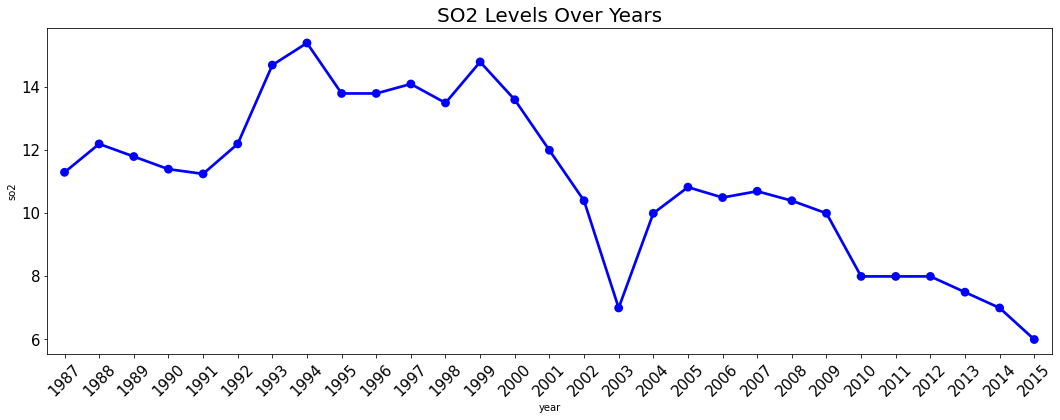

In [60]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(18,6))
plt.tick_params(axis='x', labelsize=15, rotation=45)
plt.tick_params(axis='y', labelsize=15)
sns.pointplot(x='year', y='so2', data=df, color='blue')
plt.title('SO2 Levels Over Years', fontdict={'fontsize': 20})

### Visualization of SPM across India

Text(0.5, 1.0, 'SPM Levels Over Years')

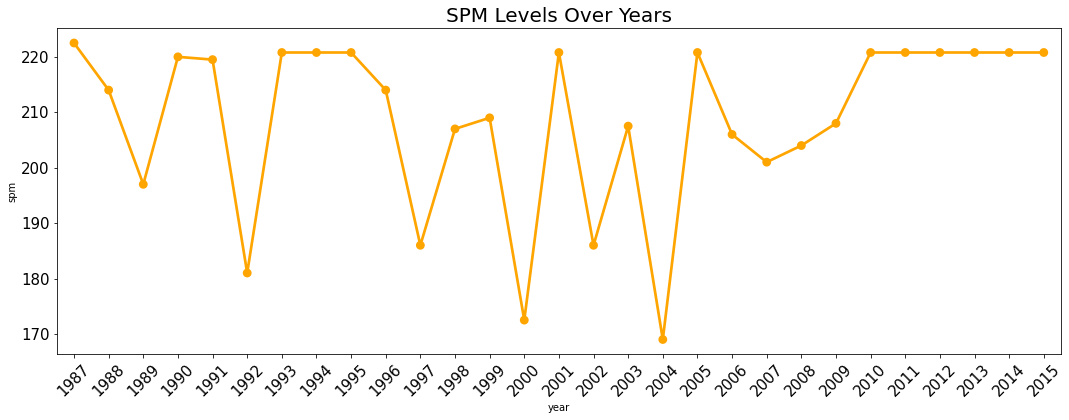

In [63]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['spm','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(18,6))
plt.tick_params(axis='x', labelsize=15, rotation=45)
plt.tick_params(axis='y', labelsize=15)
sns.pointplot(x='year', y='spm', data=df, color='orange')
plt.title('SPM Levels Over Years', fontdict={'fontsize': 20})

### Visualization of RSPM across India

Text(0.5, 1.0, 'RSPM Levels Over Years')

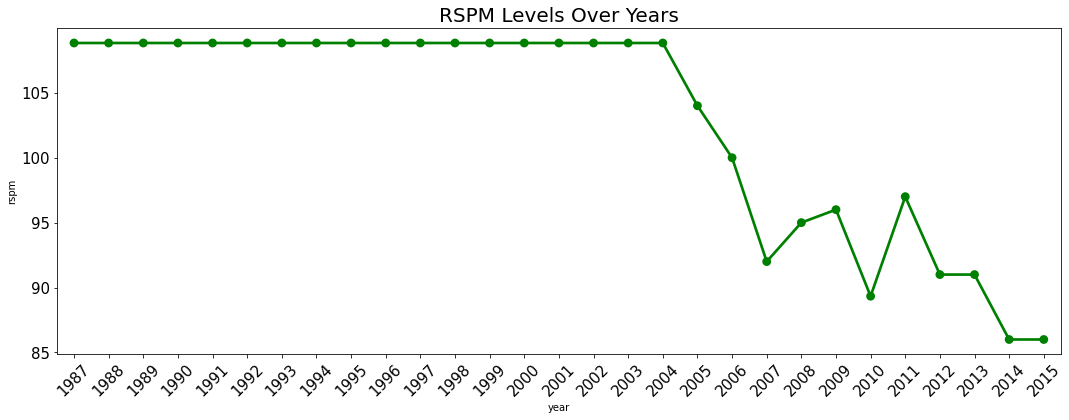

In [65]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['rspm','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(18,6))
plt.tick_params(axis='x', labelsize=15, rotation=45)
plt.tick_params(axis='y', labelsize=15)
sns.pointplot(x='year', y='rspm', data=df, color='green')
plt.title('RSPM Levels Over Years', fontdict={'fontsize': 20})

### Visualization of NO2 across India

Text(0.5, 1.0, 'NO2 Levels Over Years')

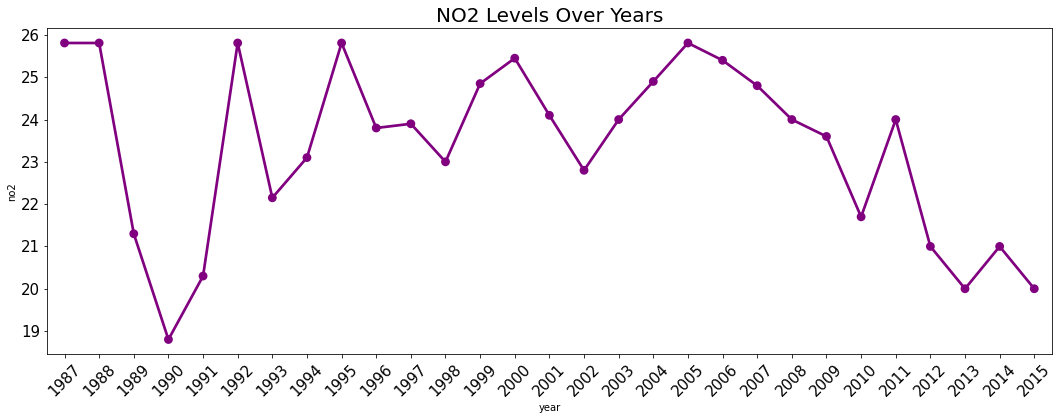

In [67]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(18,6))
plt.tick_params(axis='x', labelsize=15, rotation=45)
plt.tick_params(axis='y', labelsize=15)
sns.pointplot(x='year', y='no2', data=df, color='purple')
plt.title('NO2 Levels Over Years', fontdict={'fontsize': 20})

### Visualization of AQI across india 

Text(0.5, 1.0, 'AQI Levels Over Years')

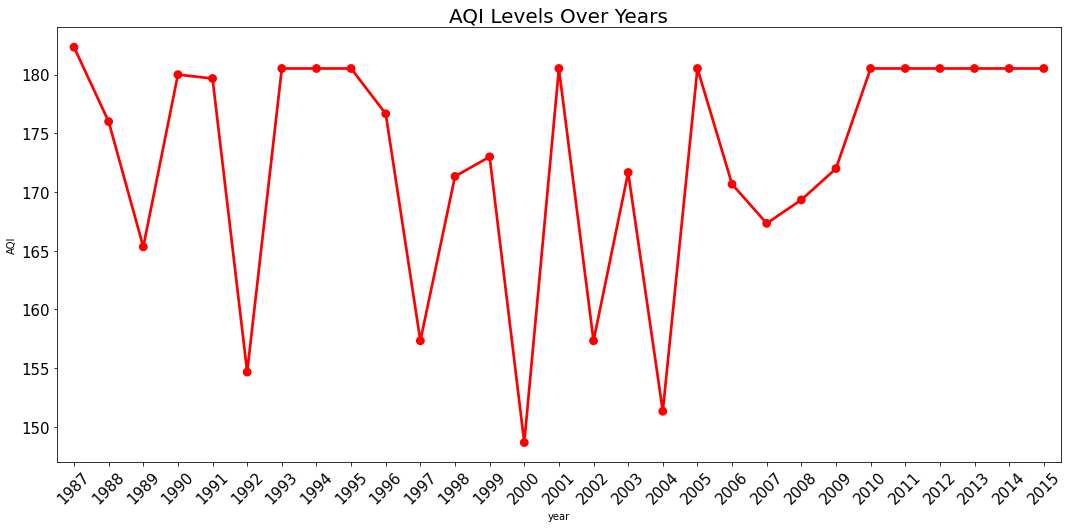

In [69]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(18,8))
plt.tick_params(axis='x', labelsize=15, rotation=45)
plt.tick_params(axis='y', labelsize=15)
sns.pointplot(x='year', y='AQI', data=df, color='red')
plt.title('AQI Levels Over Years', fontdict={'fontsize': 20})

### AQI Levels across States and Months

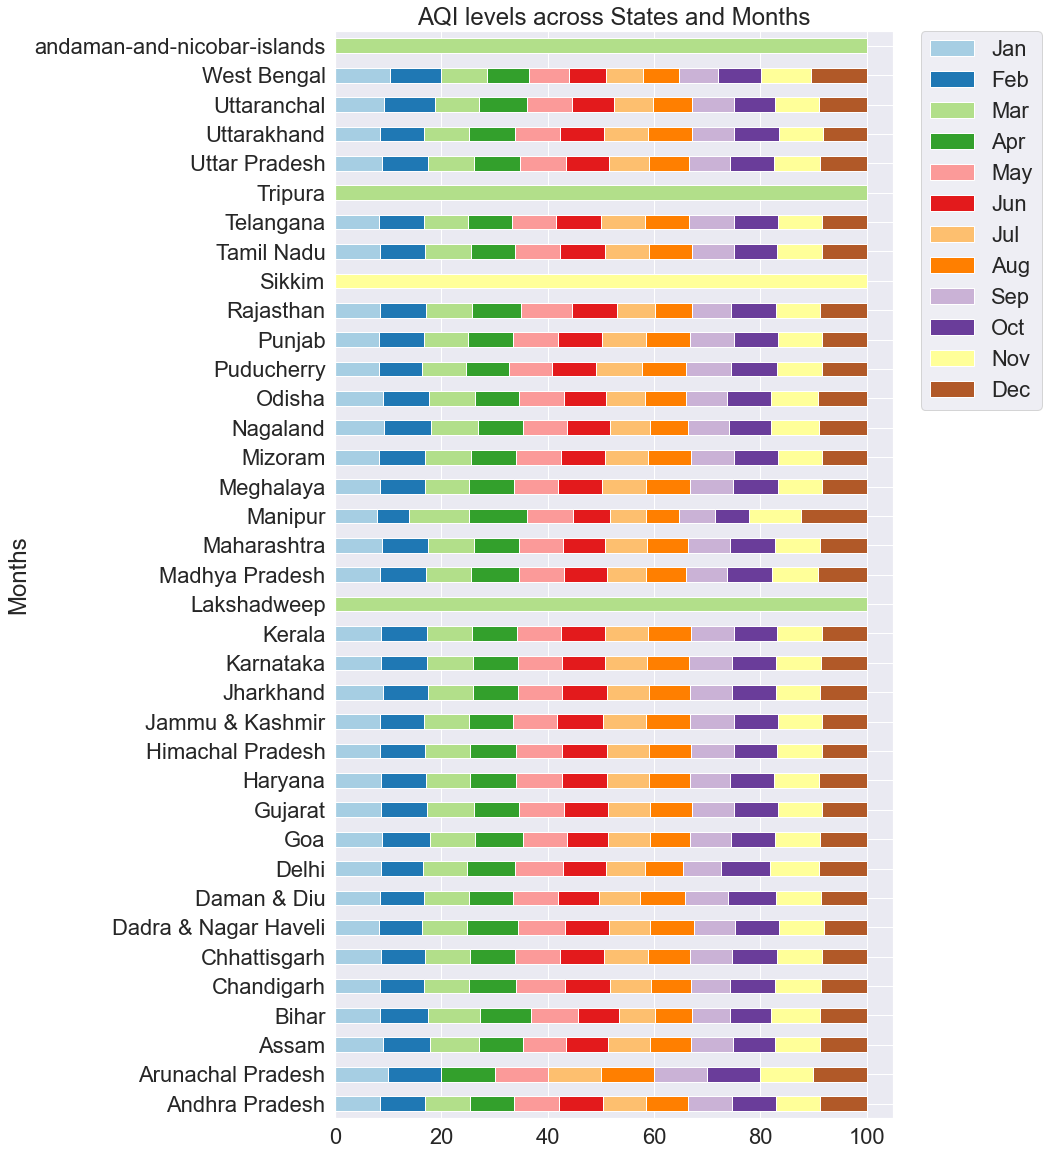

In [28]:
plt.rcParams['figure.figsize'] = (10, 20);
sns.set(palette='Paired')
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

data['Month'] = pd.DatetimeIndex(data['date']).month
df_state_month_pivot_table = data.fillna(0).sort_values(by=['state'], ascending=False) \
                                .pivot_table(values='AQI', index='state', columns='Month', aggfunc=np.mean).fillna(0)
df_state_month_pivot_table = df_state_month_pivot_table.apply(lambda x: x*100/sum(x), axis=1)

df_state_month_pivot_table.rename(columns={1:'Jan' ,2:'Feb' ,3:'Mar' ,4:'Apr' ,5:'May' ,6:'Jun',7:'Jul' ,8:'Aug' ,9:'Sep' ,10:'Oct' ,11:'Nov' ,12:'Dec'},inplace = True)

ax = df_state_month_pivot_table.plot(kind='barh', stacked=True, title='AQI levels across States and Months',grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Months');

### Distribution of AQI with different pollutants

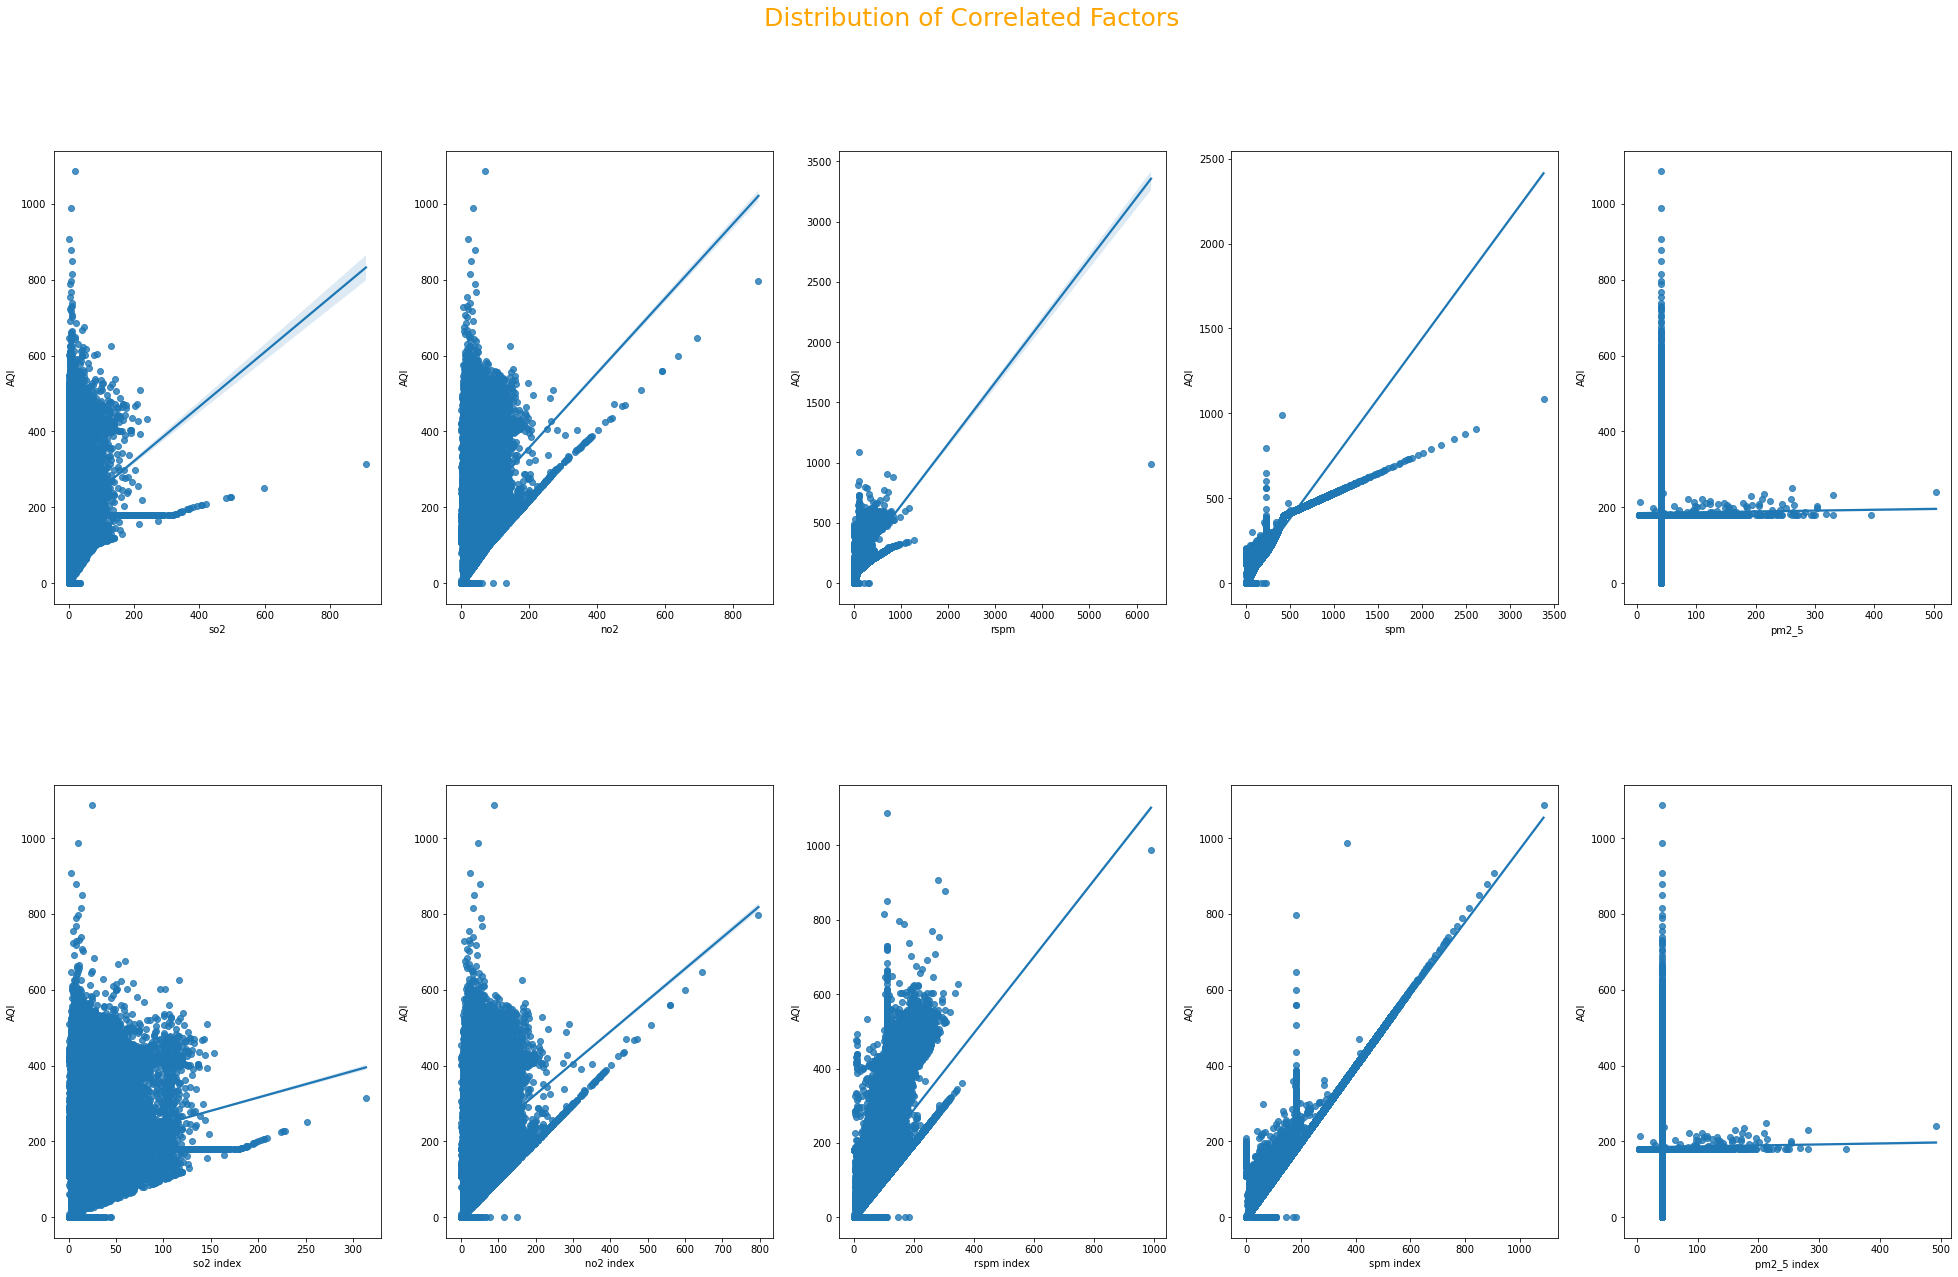

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series([],dtype=pd.StringDtype())
for col in data.columns.values[3:15]:
    if ((col!='AQI')&(col!='state')&(col!='location')&(col!='type')&(col!='date')&(col!='year')&(col!='state_label')&(col!='type_label')):
      
        colums=np.array(data[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(5):
        
        y_label=z.index[i*5+j]
        x_label=z[i*5+j]
        
        sns.regplot(data=data, x=z.index[i*5+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25', color='orange')
plt.show()

## Handling Categorical Data

### Cat Coding

In [97]:
data['state_label'] = data['state'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

data["type_label"]=data["type"].astype(str)
data["type_label"] = np.where(data["type"].str.contains('Residential, Rural and other Areas'), 1, 0)

In [98]:
data.head().style.background_gradient(cmap = "Pastel2")

,state,location,type,so2,no2,rspm,spm,pm2_5,date,so2 index,no2 index,rspm index,spm index,pm2_5 index,AQI,Year,state_label,type_label
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.783480,40.791467,1990-02-01,6.000000,21.750000,109.610928,180.522320,40.791467,180.522320,1990,0,1
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,108.832784,220.783480,40.791467,1990-02-01,3.875000,8.750000,109.610928,180.522320,40.791467,180.522320,1990,0,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.783480,40.791467,1990-02-01,7.750000,35.625000,109.610928,180.522320,40.791467,180.522320,1990,0,1
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.783480,40.791467,1990-03-01,7.875000,18.375000,109.610928,180.522320,40.791467,180.522320,1990,0,1
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,108.832784,220.783480,40.791467,1990-03-01,5.875000,9.375000,109.610928,180.522320,40.791467,180.522320,1990,0,0


# MODELING

## Linear Regression

In [133]:
x = data.drop(['state', 'location', 'type','so2', 'no2', 'rspm', 'spm','pm2_5','date','AQI','Year'] ,axis=1)
y = data['AQI']

In [134]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x1 = sc_x.fit_transform(x)

In [135]:
X_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
X_train, X_Valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

In [136]:
print (X_train.shape)
print (y_train.shape)
print (X_Valid.shape)
print (y_valid.shape)

(254124, 8)
(254124,)
(28236, 8)
(28236,)


In [137]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [38]:
Linear_reg = LinearRegression(normalize=True)
Linear_reg.fit(X_train, y_train)
y_pred = Linear_reg.predict(X_Valid)

print('RMSE:%.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

Linear_scores = cross_val_score(Linear_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

Linear_rmse_scores = np.sqrt(-Linear_scores)
display_scores(Linear_rmse_scores)
LR_score_cv = Linear_rmse_scores.mean()

LR_score_cv

RMSE:9.7950 
Scores:  [10.0601083   9.74962201  9.62557297 10.00123976  9.39575225 10.49297899
 10.6514889   9.67384593 10.50749218  9.7668782 ]
Mean:  9.992497949721391
Standard deviation:  0.4070366631448637


9.992497949721391

## Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

Ridge_R = Ridge(alpha=0.5)
Ridge_R.fit(X_train, y_train)
y_pred = Ridge_R.predict(X_Valid)

print('RMSE:%.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

Ridge_scores = cross_val_score(Ridge_R, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

Ridge_rmse_scores = np.sqrt(-Ridge_scores)
display_scores(Ridge_rmse_scores)
RR_score_cv = Ridge_rmse_scores.mean()

RR_score_cv

RMSE:9.7950 
Scores:  [10.06010835  9.74962196  9.62557288 10.0012398   9.39575222 10.49297903
 10.65148899  9.67384591 10.50749222  9.76687811]
Mean:  9.992497947099476
Standard deviation:  0.4070367119697122


9.992497947099476

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

Lasso_reg = Lasso(alpha=0.1)
Lasso_reg.fit(X_train, y_train)
y_pred = Lasso_reg.predict(X_Valid)

print('RMSE:%.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

Lasso_scores = cross_val_score(Lasso_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

Lasso_rmse_scores = np.sqrt(-Lasso_scores)
display_scores(Lasso_rmse_scores)
LaR_score_cv = Lasso_rmse_scores.mean()

LaR_score_cv

RMSE:9.7968 
Scores:  [10.0643569   9.75015315  9.62466132 10.00470134  9.39676541 10.4968332
 10.65762106  9.67557254 10.51164429  9.76623575]
Mean:  9.994854494315403
Standard deviation:  0.40891088858157176


9.994854494315403

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT_reg.fit(X_train, y_train)
y_pred = DT_reg.predict(X_Valid)

print('RMSE:%.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

cv_scores = cross_val_score(DT_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=3)

DT_scores = np.sqrt(-cv_scores)
display_scores(DT_scores)
DT_score_cv = DT_scores.mean()

DT_score_cv

RMSE:3.7161 
Scores:  [2.84285594 3.01307498 3.0214837  3.61836126 2.45423325 3.72138799
 3.80382432 2.53017819 4.26405623 2.58957322]
Mean:  3.1859029087339743
Standard deviation:  0.5927490892488945


3.1859029087339743

#### Hyperparameter tuning for Decision Tree

In [42]:
param_random_DT = [{'min_samples_leaf': [50, 100], 'max_depth': [6, 12]}]

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_random_DT, 
                                   cv=3,n_jobs=-1,scoring="neg_mean_squared_error")

random_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions=[{'max_depth': [6, 12],
                                         'min_samples_leaf': [50, 100]}])

In [43]:
random_search.best_params_

{'min_samples_leaf': 50, 'max_depth': 12}

In [44]:
random_DT_reg = DecisionTreeRegressor(max_depth=12, min_samples_leaf=50)

random_DT_reg.fit(X_train, y_train)
y_pred = random_DT_reg.predict(X_Valid)

print('RMSE:%.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

cv_scores1 = cross_val_score(random_DT_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=3)

DT_rmse_scores = np.sqrt(-cv_scores1)
display_scores(DT_rmse_scores)
DT_score1_cv = DT_rmse_scores.mean()

DT_score1_cv

RMSE:3.2328 
Scores:  [2.46577927 2.61905728 2.682917   2.98530737 2.24051638 3.11130985
 3.37748255 2.35603315 4.09170189 2.35103568]
Mean:  2.828114040431207
Standard deviation:  0.5472822084678998


2.828114040431207

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor( n_jobs=3, max_depth=5, n_estimators=200, min_samples_leaf=60,)
RF_reg.fit(X_train, y_train.values.ravel())
y_pred = RF_reg.predict(X_Valid)

print('RMSE: %.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

cv_scores = cross_val_score(RF_reg, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error", cv=3)

RF_scores = np.sqrt(-cv_scores)
display_scores(RF_scores)
RF_score_cv = RF_scores.mean()

RF_score_cv

RMSE: 5.9243 
Scores:  [6.48576151 6.19295007 5.51695964 5.74555818 7.27503896 6.13362235
 5.93446302 6.22963295 5.76837571 6.03928864]
Mean:  6.132165102711382
Standard deviation:  0.46393809305817313


6.132165102711382

#### Hyperparameter tuning for Random Forest

In [46]:
param_random_RF = [{'bootstrap': [False,True], 'max_depth': [3, 5], 'n_estimators': [100, 200], 
                       'min_samples_leaf':[50,100]}]

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_random_RF, cv=3,
                                   n_jobs=-1,scoring="neg_mean_squared_error")

random_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [False, True],
                                         'max_depth': [3, 5],
                                         'min_samples_leaf': [50, 100],
                                         'n_estimators': [100, 200]}])

In [47]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 50,
 'max_depth': 5,
 'bootstrap': True}

In [146]:
random_RF_reg = RandomForestRegressor(bootstrap=True,max_depth=5,n_estimators=100,min_samples_leaf=50)

random_RF_reg.fit(X_train, y_train.values.ravel())
y_pred = random_RF_reg.predict(X_Valid)


print('RMSE: %.4f '% np.sqrt(mean_squared_error(y_valid, y_pred)))

cv_scores1 = cross_val_score(random_RF_reg, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error", cv=3)

RF_rmse_scores2 = np.sqrt(-cv_scores1)
display_scores(RF_rmse_scores2)
RF_score1_cv = RF_rmse_scores2.mean()

RF_score1_cv

RMSE: 5.9259 
Scores:  [6.47190956 6.17180932 5.51608117 5.69868876 7.26162552 6.06529566
 5.92627379 6.20364    5.82522993 6.01731809]
Mean:  6.115787178830075
Standard deviation:  0.46008999500632003


6.115787178830075

## XGBoost

In [49]:
import xgboost 
from xgboost import XGBRegressor

XgB_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=2)
XgB_model.fit(X_train, y_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
from sklearn import metrics

pred = XgB_model.predict(X_Valid)

print("Mean Absolute Error: " + str(mean_absolute_error(pred,y_valid)))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(pred,y_valid)))

scores = cross_val_score(XgB_model, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error", cv=3)

xgb_scores = np.sqrt(-scores)
display_scores(xgb_scores)
XG_score_cv= xgb_scores.mean()

XG_score_cv

Mean Absolute Error: 1.0916303773092244
RMSE: 2.65
Scores:  [2.67730246 2.83786603 2.9519558  2.77863739 2.91179793 2.97567245
 2.7715291  2.79406675 3.87803883 2.59423778]
Mean:  2.917110453480121
Standard deviation:  0.3393520369380651


2.917110453480121

#### Hyperparameter tuning for Random Forest

In [51]:
param_random = {'n_estimators':[300,500], 'learning_rate':[0.001,0.01], 'max_depth':range(3,6),
                'min_child_weight': [6,10], 'gamma' :[i/10.0 for i in range(0,5)]}

XgB_model1 = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_random, cv=3, n_jobs=None,
                                scoring="neg_mean_squared_error")

XgB_model1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.01],
                                        'max_depth': range(3, 6),
                                        'min_child_weight': [6, 10],
                                        'n_estimators': [300, 500]})

In [52]:
XgB_model1.best_params_

{'n_estimators': 500,
 'min_child_weight': 6,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.3}

In [53]:
XGB_model1= XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, min_child_weight = 10, gamma = 0.1)

XGB_model1.fit(X_train, y_train)
y_pred = XGB_model1.predict(X_Valid)

print("Mean Absolute Error: " + str(mean_absolute_error(y_pred,y_valid)))
print("RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(y_pred,y_valid)))

cv_scores1 = cross_val_score(XgB_model1, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error", cv=3)

xg_scores = np.sqrt(-cv_scores1)
display_scores(xg_scores)
XG_score1_cv= xg_scores.mean()

XG_score1_cv

Mean Absolute Error: 1.3931577293119968
RMSE: 2.242
Scores:  [2.26442475 2.12433428 2.1263473  2.47091676 2.36027302 2.60931281
 4.24437148 2.23625154 4.01229071 2.40889275]
Mean:  2.6857415397250004
Standard deviation:  0.7369718553033467


2.6857415397250004

## Performance evaluation

In [54]:
model_scores = []

model_scores.append(LR_score_cv)
model_scores.append(RR_score_cv)
model_scores.append(LaR_score_cv)
model_scores.append(DT_score1_cv)
model_scores.append(RF_score1_cv)
model_scores.append(XG_score1_cv)

print (model_scores)

model_names = ['Linear_Regression','Ridge_Regression','Lasso_Regression','Decision_Tree','Random_Forest','XGBoost']

print (model_names)

[9.992497949721391, 9.992497947099476, 9.994854494315403, 2.828114040431207, 6.142565469265416, 2.6857415397250004]
['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'Decision_Tree', 'Random_Forest', 'XGBoost']


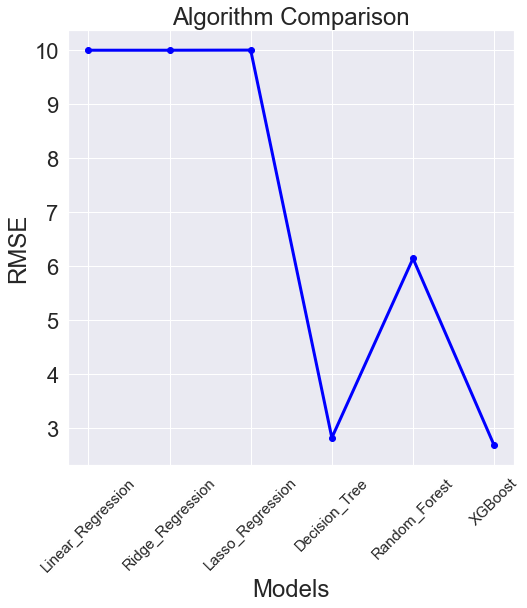

In [55]:
#Plotting RMSE for every algorithm
fig = plt.figure(figsize=(8,8))

plt.plot(model_names,model_scores,color='blue', marker='o')
plt.tick_params(axis='x', labelsize=15, rotation=45)

plt.title('Algorithm Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.show()

## Plotting scores after hyperparameter tuning 

In [56]:
models_non_HT = []

models_non_HT.append(DT_score_cv)
models_non_HT.append(RF_score_cv)
models_non_HT.append(XG_score_cv)

print (models_non_HT)

model_names_non_HT = ['Decision_Tree','Random_Forest','XGBoost']

print (model_names_non_HT)

[3.1859029087339743, 6.151047122114986, 2.917110453480121]
['Decision_Tree', 'Random_Forest', 'XGBoost']


In [57]:
models_HT = []

models_HT.append(DT_score1_cv)
models_HT.append(RF_score1_cv)
models_HT.append(XG_score1_cv)

print (models_HT)

model_names_HT = ['Decision_Tree','Random_Forest','XGBoost']

print (model_names_HT)

[2.828114040431207, 6.142565469265416, 2.6857415397250004]
['Decision_Tree', 'Random_Forest', 'XGBoost']


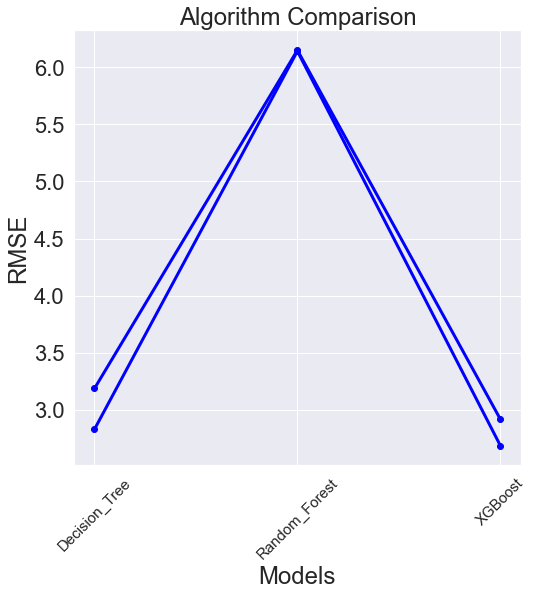

In [58]:
#Plotting RMSE for every algorithm
fig = plt.figure(figsize=(8,8))

plt.plot(model_names_non_HT,models_non_HT,color='blue', marker='o', label="HPs tuned")
plt.plot(model_names_HT,models_HT,color='blue', marker='o', label="HPs tuned")
plt.tick_params(axis='x', labelsize=15, rotation=45)

plt.title('Algorithm Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.show()

## Evaluating performance on the test data with best Classifier

In [ ]:
x_test.style.background_gradient(cmap = "Pastel2")

In [147]:
data_test = sc_x.fit_transform(x_test)

In [148]:
y_test_pred = XgB_model1.predict(data_test)

In [149]:
y_test_pred

array([47.74003836, 47.74003836, 47.74003836, ..., 47.74003836,
       47.74003836, 47.74003836])

<AxesSubplot:ylabel='Density'>

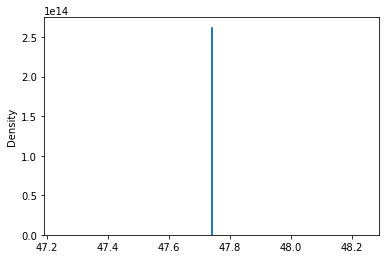

In [150]:
sns.distplot(y_test_pred)